1. Discussão:

Formalização do Problema: Desde a década de 70, quando a produção de biocombustíveis começou a ser incentivada no Brasil, a demanda por etanol vem crescendo como uma alternativa mais acessível ao consumidor. Assim, o objetivo deste projeto foi utilizar um modelo de Regressão Linear para previsão do preço médio do etanol hidratado.

Análise Exploratória: Como análise exploratória foi feito um resumo estatistico, a criação de histogramas para o valor das variáveis serem vistos ao longo do tempo e foi calculada a matriz de correlação para entender a dependência linear entre as variáveis.

A principal transformação dos dados executada foi o corte da base de dados anteriores a data de 01/01/2017 devido a mudanças de legislação na precificação dos combustíveis e a adaptação da base de dados para que todas as amostragens de preço fossem consideradas semanalmente, já que algumas observações eram diárias e outras semanais, para essa adaptação foi realizado o cálculo de média simples dos valores diários para definir o valor semanal de uma variável.

Para aplicação do modelo de Regressão Linear os valores foram normalizados entre os valores de 0-1.

Algoritmos:

    Regressão linear: é um método estatístico que busca estabelecer uma relação linear entre a variável dependente (a variável que você deseja prever) e uma ou mais variáveis independentes (as variáveis que você usa para prever a variável dependente).

Escolha dos algoritmos:

    Regressão Linear: Pela sua simplicidade e fácil entendimento a Regressão Linear passa a ser uma boa escolha, além disto ela é adequada para prever variáveis continuas (como preço de comodities que estamos lidando) e também pode ser uma boa indicadora de tendências.

    

2. Trabalhos Correlatos:


Regressão Linear: No trabalho de Carassai, Aline Ferrarini, et al. "ANÁLISE MULTIVARIADA APLICADA AO PREÇO DO ETANOL HIDRATADO PRATICADO NO BRASIL." foi utilizado um algoritmo de Regressão Linear Multipla para fazer a previsão de preço do Etanol Hidratado. Neste trabalho os autores fizeram uma análise de diversas variáveis preditoras para identificar quais possuiam uma maior correlação com o preço do Etanol Hidratado. Escolherem as variáveis com maior correlação e ao aplicar o método obtiveram resultados próximos ao que seria o resultado real.

3. Metodologia

Como métrica de avaliação foram utilizados medidas estatisticas básicas como: média, mediana, DP, variância, etc. Foi também calculado o erro médio quadrático e os resultados esperados X obtidos foram plotados em um gráfico para que tenhamos uma melhor visualização dos resultados.

Foram aplicados dois testes:
No primeiro teste treinamos o conjunto com a base de treino e testamos a predição com a base de testes.
No segundo teste treinamos o conjunto com a base de treino e testamos a predição também com a base de treino.

4. Aplicação dos Algoritmos:

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


directory = 'dados2/'
df1 = pd.read_csv(directory + 'acucar_diario_ny_usd.csv')
df2 = pd.read_csv(directory + 'acucar_diario_rp_blr.csv')
df3 = pd.read_csv(directory + 'brent_diario_usd.csv')
df4 = pd.read_csv(directory + 'dolar_diario_blr.csv')
df5 = pd.read_csv(directory + 'etanol_semanal_anp_blr.csv')
df6 = pd.read_csv(directory + 'gasolina_semanal_anp_blr.csv')
df7 = pd.read_csv(directory + 'rbob_diario_usd.csv')

df1 = df1[['data_inicio', 'acucar_usd']]
df2 = df2[['data_inicio', 'acucar_blr']]
df3 = df3[['data_inicio', 'brent_usd']]
df4 = df4[['data_inicio', 'dolar_blr']]
df5 = df5[['data_inicio', 'etanol_blr']]
df6 = df6[['data_inicio', 'gasolina_blr']]
df7 = df7[['data_inicio', 'rbob_usd']]

df = pd.merge(df1, df2, on='data_inicio')
df = pd.merge(df, df3, on='data_inicio')
df = pd.merge(df, df4, on='data_inicio')
df = pd.merge(df, df6, on='data_inicio')
df = pd.merge(df, df7, on='data_inicio')

df = df.drop('data_inicio', axis=1)
df5 = df5.drop('data_inicio', axis=1)


scalerX = MinMaxScaler()
dfX_normalized = pd.DataFrame(scalerX.fit_transform(df), columns=df.columns)

scalerY = MinMaxScaler()
dfY_normalized = pd.DataFrame(scalerY.fit_transform(df5['etanol_blr'].values.reshape(-1, 1)))

model = LinearRegression()
model.fit(dfX_normalized, dfY_normalized)


directory_teste = 'dados_teste2/'
dfTeste1 = pd.read_csv(directory_teste + 'acucar_diario_ny_usd.csv')
dfTeste2 = pd.read_csv(directory_teste + 'acucar_diario_rp_blr.csv')
dfTeste3 = pd.read_csv(directory_teste + 'brent_diario_usd.csv')
dfTeste4 = pd.read_csv(directory_teste + 'dolar_diario_blr.csv')
dfTeste5 = pd.read_csv(directory_teste + 'etanol_semanal_anp_blr.csv')
dfTeste6 = pd.read_csv(directory_teste + 'gasolina_semanal_anp_blr.csv')
dfTeste7 = pd.read_csv(directory_teste + 'rbob_diario_usd.csv')

dfTeste1 = dfTeste1[['data_inicio', 'acucar_usd']]
dfTeste2 = dfTeste2[['data_inicio', 'acucar_blr']]
dfTeste3 = dfTeste3[['data_inicio', 'brent_usd']]
dfTeste4 = dfTeste4[['data_inicio', 'dolar_blr']]
dfTeste5 = dfTeste5[['data_inicio', 'etanol_blr']]
dfTeste6 = dfTeste6[['data_inicio', 'gasolina_blr']]
dfTeste7 = dfTeste7[['data_inicio', 'rbob_usd']]

dfTeste = pd.merge(dfTeste1, dfTeste2, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste3, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste4, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste6, on='data_inicio')
dfTeste = pd.merge(dfTeste, dfTeste7, on='data_inicio')

dfTeste = dfTeste.drop('data_inicio', axis=1)

scalerX = MinMaxScaler()
dfXTeste_normalized = pd.DataFrame(scalerX.fit_transform(dfTeste), columns=dfTeste.columns)

scalerY = MinMaxScaler()
dfYTeste_normalized = pd.DataFrame(scalerY.fit_transform(dfTeste5['etanol_blr'].values.reshape(-1, 1)))


X = dfXTeste_normalized
#X = dfX_normalized
Y = dfYTeste_normalized
#Y = dfY_normalized

yPred = model.predict(X)
print('Coeficientes:', model.coef_)
print('Intercept:', model.intercept_)
print('R²:', model.score(X, Y))

yPred = scalerY.inverse_transform(yPred)

saidaEsperada = dfTeste5['etanol_blr']
#saidaEsperada = df5['etanol_blr']
saidaObtida = yPred

Coeficientes: [[ 0.11039376  0.17212458 -0.25720083 -0.12307892  0.99342435 -0.04998895]]
Intercept: [0.04784299]
R²: -0.18180110814356132


In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(saidaEsperada, saidaObtida)

difs = []
for i in range(len(saidaObtida)):
    difs.append(saidaEsperada[i] - saidaObtida[i])

media = np.mean(difs)
mediana = np.median(difs)
minimo = np.min(difs)
maximo = np.max(difs)
desvio_padrao = np.std(difs)
variancia = np.mean([(x - media) ** 2 for x in difs])
coeficiente_variacao = (desvio_padrao / media) * 100

print("Mínimo:", minimo)
print("Máximo:", maximo)
print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Variância:", variancia)
print("Coeficiente de Variação:", coeficiente_variacao)
print("Erro médio quadrático (MSE):", mse)

Mínimo: 0.01699921343168187
Máximo: 0.40632574553982836
Média: 0.2059969835275922
Mediana: 0.20206632923803758
Desvio Padrão: 0.11972903702379978
Variância: 0.01433504230664642
Coeficiente de Variação: 58.121742839871594
Erro médio quadrático (MSE): 0.056769799529113506


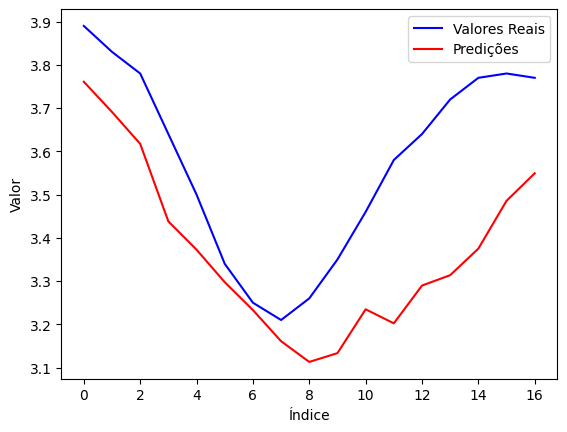

In [42]:

import matplotlib.pyplot as plt

indices = range(len(saidaEsperada))

arrReal = np.array(saidaEsperada)
arrPredicao = np.array(saidaObtida)

plt.plot(indices, arrReal, 'b-', label='Valores Reais')

plt.plot(indices, arrPredicao, 'r-', label='Predições')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

plt.show()

5. Resultados:


O modelo inesperadamente obteve resultado melhor na base de testes do que na própria base de treinamento o que sugere que o modelo é simples demais para a natureza do problema.

Para a regressão linear foram utilizados os valores padrões da biblioteca.

Para os dados de treinamento obtivemos os seguintes resultados:

Mínimo: -1.0767968825672263

Máximo: 1.4985003393861764

Média: -0.2677770318021204

Mediana: -0.5505178070887

Desvio Padrão: 0.6664820975208445

Variância: 0.44419838631578445

Coeficiente de Variação: -248.89442273501476

Erro médio quadrático (MSE): 0.5159029250765382

Nota-se que os valores estão muito insatisfatórios visto que se está tentando prever o preço de uma comoditie que guiará uma decisão estratégica não podemos ter um desvio padrão de 0.66 centavos de erro isto é um valor muito alto para se errar.

Já para os dados de teste obtivemos os seguintes resultados:

Mínimo: 0.01699921343168187

Máximo: 0.40632574553982836

Média: 0.2059969835275922

Mediana: 0.20206632923803758

Desvio Padrão: 0.11972903702379978

Variância: 0.01433504230664642

Coeficiente de Variação: 58.121742839871594

Erro médio quadrático (MSE): 0.056769799529113506

Com os dados de teste temos menos variação, porém mesmo que o DP e o MSE sejam relativamente baixos, temos que o modelo pode errar por um valor muito grande como a diferença máxima obtida de 0.40 centavos. Isto acaba tornando inviável também o seu uso já que poderia se ganhar ou perder muito dinheiro.

6. Discussões

Quando os resultados são comparados com o autor original da base de dados, o modelo tem um erro 'razoável', baixo DP para a base de testes porém com alguns valores de predição com uma grande diferença do original.

7. Conclusões e Trabalhos Futuros

Assim como o autor da base de dados, também concluimos que apesar do modelo apresentar erros que aparentam ser pequenos o seu uso é inviável, visto que o modelo pode errar por uma grande diferença também o que acarretaria em prejuizos igualmente grandes.

Como trabalho futuro é possível de tentar utilizar outras formas de normalização para observar se os resultados obtidos se tornam mais satisfatórios, pode também aumentar o tamanho da base a ser considerada, ou tentar utilizar outra maneira de aglutinação dos valores que possuem observações diárias visto que a média é uma medida muito simples.